In [6]:
# Jupyter Cell 1
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/001_cgm_processed.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
df["glucose_target"] = df["glucose_mgdl"].shift(-6)
df.dropna(inplace=True)

X = df[["glucose_mgdl"]]
y = df["glucose_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

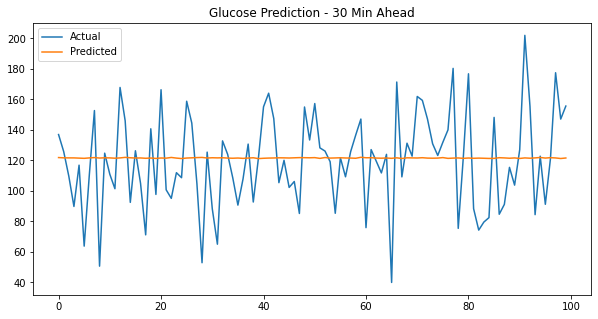

In [7]:
# Jupyter Cell 2: Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted")
plt.legend()
plt.title("Glucose Prediction - 30 Min Ahead")
plt.show()